In [1]:
import tensorflow as tf
from tensorflow import keras
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs available: {len(gpus)}")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs available.")

2025-05-17 23:45:36.610078: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-17 23:45:36.620226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747512936.631972   86062 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747512936.635561   86062 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747512936.644500   86062 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

GPUs available: 1
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
import pandas as pd
print("NumPy version:", pd.__version__)


NumPy version: 2.2.2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import mnist
import os

mnist.temporary_dir = lambda: os.path.abspath('data/mnist')

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()


In [7]:
train_images.shape

(60000, 28, 28)

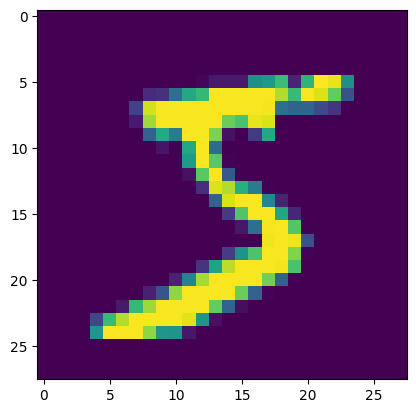

5


In [8]:
plt.imshow(train_images[0])
plt.show()
print(train_labels[0])

In [9]:
train_images,test_images = train_images/255,test_images/255
train_images,test_images= np.expand_dims(train_images,axis=3),np.expand_dims(test_images,axis=3)

In [10]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras import Sequential
model=Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              optimizer='adam')

/home/pouria-mirzaeai/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747513041.874007   86062 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6117 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [11]:
h = model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=100)

Epoch 1/100


I0000 00:00:1747513075.189352   86543 service.cc:152] XLA service 0x7755bc004f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747513075.189368   86543 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-05-17 23:47:55.203093: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747513075.280881   86543 cuda_dnn.cc:529] Loaded cuDNN version 90300


  82/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4888 - loss: 1.7457  

I0000 00:00:1747513076.187710   86543 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8623 - loss: 0.4857 - val_accuracy: 0.0964 - val_loss: 6.1940
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1166 - val_accuracy: 0.0982 - val_loss: 6.6097
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9767 - loss: 0.0788 - val_accuracy: 0.0931 - val_loss: 6.0455
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0608 - val_accuracy: 0.0962 - val_loss: 6.3172
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9851 - loss: 0.0478 - val_accuracy: 0.0977 - val_loss: 7.1238
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.0956 - val_loss: 7.3433
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.0955 - val_loss: 7.9739
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0272 - val_

KeyboardInterrupt: 

In [ ]:
out = model.predict(test_images)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
model.save('ocr.h5')

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np

model = Sequential([
    ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])

X = np.random.rand(200, 224, 224, 3).astype(np.float32)
y = np.random.randint(0, 10, size=(200,))
y = tf.keras.utils.to_categorical(y, 10)

model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(X, y, batch_size=32, epochs=5)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - loss: 103.4273
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 165.4854
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 19.6378
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - loss: 11.9396
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 8.4283


In [13]:
import tensorflow as tf
import time

with tf.device('/CPU:0'):
    start = time.time()
    a = tf.random.normal([10000, 10000])
    b = tf.random.normal([10000, 10000])
    c = tf.matmul(a, b)
    print("CPU time:", time.time() - start)

with tf.device('/GPU:0'):
    start = time.time()
    a = tf.random.normal([10000, 10000])
    b = tf.random.normal([10000, 10000])
    c = tf.matmul(a, b)
    print("GPU time:", time.time() - start)


CPU time: 3.0951054096221924
GPU time: 0.020487308502197266
